In [29]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [22]:
# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [45]:
# This cell is not needed as a sample dataframe is created in the next cell.

df = pd.read_csv("/twitter_training.csv" , names=["Id","Country","Label","Text"])

In [46]:
df

,Id,Country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [39]:
print(df.shape)


(74682, 4)


In [41]:
df.head(10)

,id,country,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   country  74682 non-null  object
 2   label    74682 non-null  object
 3   text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [47]:
df['Label'].value_counts()


,count
Label,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [51]:
df[["Label","Text"]]


,Label,Text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [53]:
df.isnull().sum()

,0
Id,0
Country,0
Label,0
Text,686


In [54]:
df.dropna(inplace=True)

In [57]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [69]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

In [79]:
df.drop(columns=['Cleaned_Text'], inplace=True)

In [81]:
sia = SentimentIntensityAnalyzer()

In [83]:
df['Sentiment_Scores'] = df['Text'].apply(lambda x: sia.polarity_scores(x))
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [84]:
df['Sentiment'] = df['Compound_Score'].apply(classify_sentiment)

In [85]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    33161
Negative    26986
Neutral     13849
Name: count, dtype: int64


/tmp/ipython-input-86-1752459092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


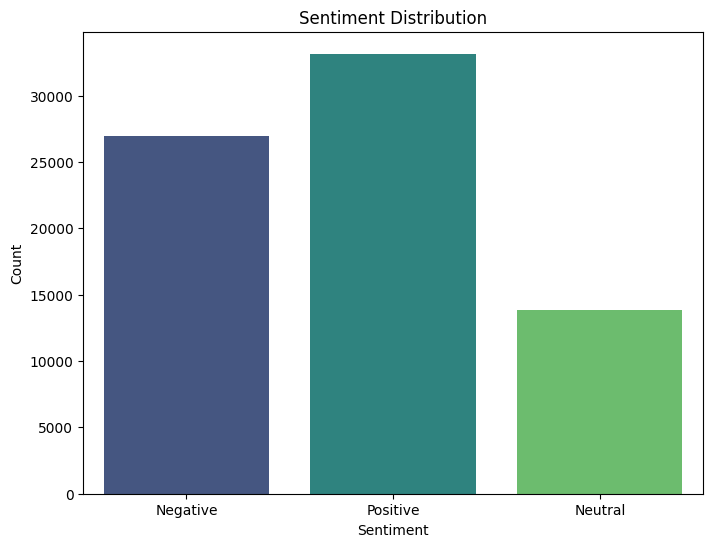

In [86]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [92]:
from sklearn.preprocessing import LabelEncoder

le_model = LabelEncoder()
df['Label'] = le_model.fit_transform(df['Label'])

In [95]:
df.head(5)


,Id,Country,Label,Text,Sentiment_Scores,Compound_Score,Sentiment,Preprocessed Text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,Negative,None
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.6908,Negative,None
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,Negative,None
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,Negative,None
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.6908,Negative,None


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label'])

In [107]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (59196,)
Shape of X_test:  (14800,)


In [108]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


classifier = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (RandomForestClassifier()))
])

In [109]:
classifier.fit(X_train, y_train)


Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', RandomForestClassifier())])

In [112]:
y_pred = classifier.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_pred))

0.9219594594594595


In [115]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2575
           1       0.91      0.95      0.93      4472
           2       0.92      0.92      0.92      3622
           3       0.90      0.93      0.92      4131

    accuracy                           0.92     14800
   macro avg       0.93      0.92      0.92     14800
weighted avg       0.92      0.92      0.92     14800



In [116]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [126]:
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Combine all cleaned text for the word cloud
all_text = ' '.join(df['Cleaned_Text'])

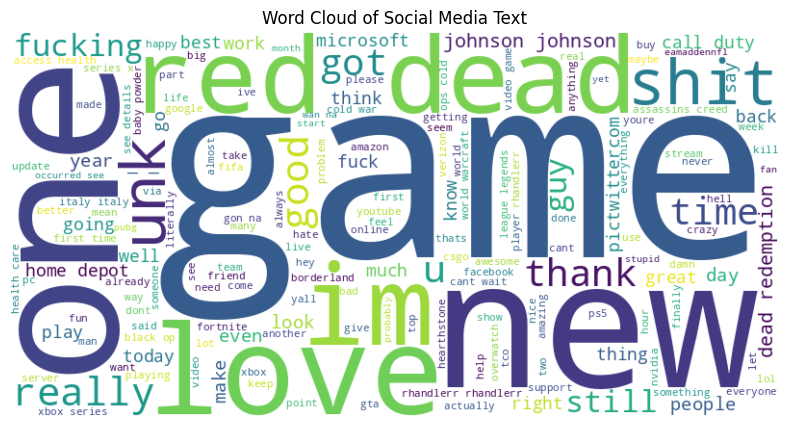

In [122]:
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Social Media Text')
plt.axis('off')
plt.show()

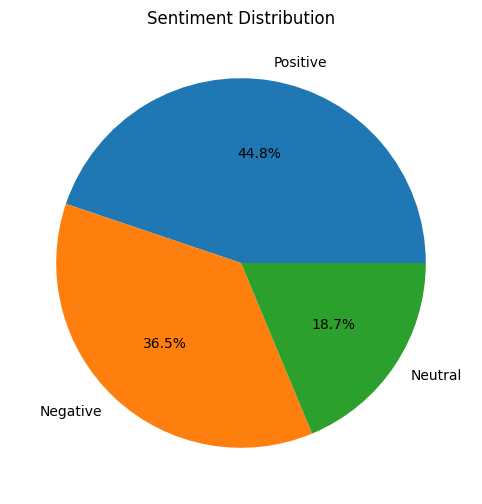

In [133]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',)
plt.title('Sentiment Distribution')
plt.show()

<Figure size 1200x800 with 0 Axes>

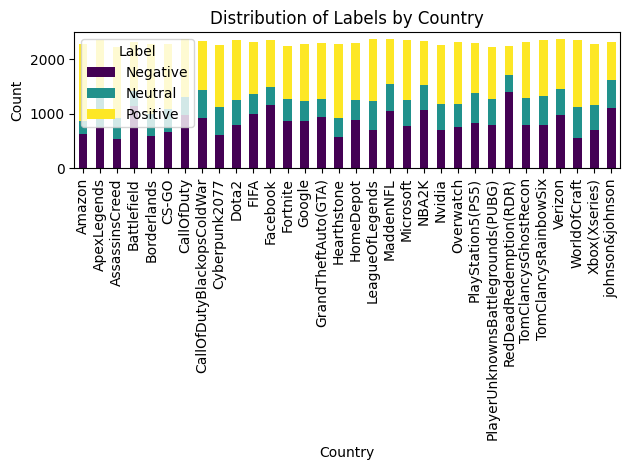

In [162]:

# Step 5: Visualization 3 - Distribution of Labels by Country
if 'Country' in df.columns:
    # Assuming 'Sentiment' is the label column; adjust if named 'Label'
    label_by_country = df.groupby(['Country', 'Sentiment']).size().unstack(fill_value=0)

    # Plot stacked bar plot
    plt.figure(figsize=(12, 8))
    label_by_country.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Distribution of Labels by Country')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.legend(title='Label')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No 'Country' column found. Skipping Distribution of Labels by Country.")

In [154]:
most_negative =label_by_country['Negative'].sort_values(ascending=False)

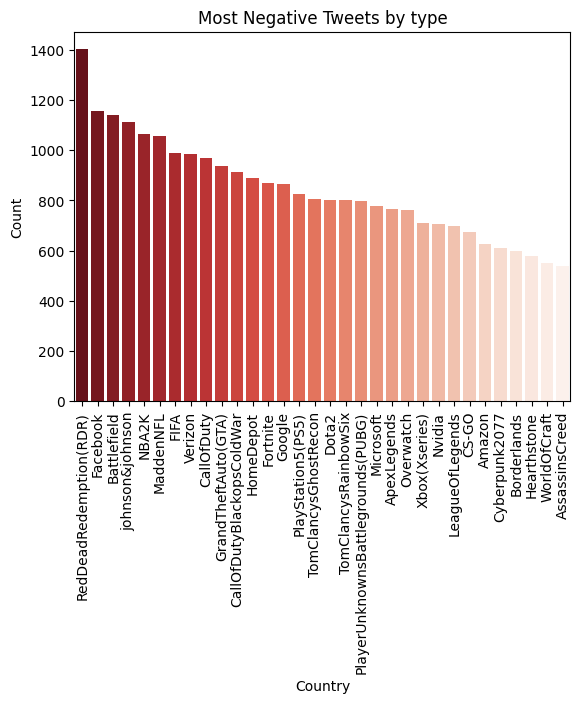

In [159]:
sns.barplot(x=most_negative.index, y=most_negative.values, palette='Reds_r')
plt.title('Most Negative Tweets by type')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [166]:
df

,Id,Country,Label,Text,Sentiment_Scores,Compound_Score,Sentiment,Cleaned_Text
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,Negative,im getting borderlands murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.6908,Negative,coming borders kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,Negative,im getting borderlands kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,Negative,im coming borderlands murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.6908,Negative,im getting borderlands 2 murder
...,...,...,...,...,...,...,...,...
74677,9200,Nvidia,3,Just realized that the Windows partition of my...,"{'neg': 0.086, 'neu': 0.817, 'pos': 0.097, 'co...",0.0772,Positive,realized windows partition mac like 6 years be...
74678,9200,Nvidia,3,Just realized that my Mac window partition is ...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2960,Negative,realized mac window partition 6 years behind n...
74679,9200,Nvidia,3,Just realized the windows partition of my Mac ...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",-0.2960,Negative,realized windows partition mac 6 years behind ...
74680,9200,Nvidia,3,Just realized between the windows partition of...,"{'neg': 0.074, 'neu': 0.842, 'pos': 0.084, 'co...",0.0772,Positive,realized windows partition mac like 6 years be...
